### Importing the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Declaring constants

In [2]:
R = 7e8     # Radius of the star

### Concepts used
- Atleast 3 transits are required to confirm whether there exists an exoplanet or not
- Difference in time between two dips is the orbital period of the exoplanet
- Difference in time between the starting and ending of the dip in relative brightness is the transit duration of the exoplanet

- $R_{p}$ = $R_{s} \times \sqrt{depth}$
    - $R_{p}$ = Radius of the exoplanet
    - $R_{s}$ = Radius of the exoplanet's host star
    - $depth$ = Depth of the minima (from 1) in the corrected relative brightness graph

### TransitingExoplanet
The class has the following variables:
- private:
    - **__minimas**: Location of minimas of the graph
- public:
    - **time**: The time array
    - **fraw**: The raw relative brightness data
    - **radius_star**: Radius of the host star (assuming single star system)
    - **fcor**: The corrected relative brightness data
    - **radius**: Radius of the exoplanet
    - **orbital_period**: Time (in Earth days) required by the planet to complete 1 revolution around the star
    - **transit_duration**: Time (in hours) taken by the planet to completely transit it's host star

In [3]:
class TransitingExoplanet():
    def __init__(self, time, fraw, radius_star):
        self.time = np.array(time)
        self.fraw = np.array(fraw)
        self.radius_star = radius_star
        
        self.fcor = np.array([])
        self.__minimas = []
        self.radius = 0
        self.orbital_period = 0
        self.transit_duration = 0

    def correct_data(self, threshold):
        indices = np.where(abs(self.fraw) > threshold)
        self.fcor = self.fraw.copy()
        self.fcor[indices] = 1
        self.__find_minimas()
        self.__calc_radius()
        self.__calc_orbital_period()
        self.__calc_transit_duration()

    def __find_minimas(self):
        for i in range(1, len(self.fcor)-1):
            if (self.fcor[i-1]>self.fcor[i]) and (self.fcor[i]<self.fcor[i+1]):
                self.__minimas.append(i)

    def __calc_radius(self):
        depths = np.array([1-self.fcor[i] for i in self.__minimas])
        depth = np.average(depths)
        self.radius = self.radius_star * np.sqrt(depth)

    def __calc_orbital_period(self):
        transit_days = []
        for i in range(1, len(self.__minimas)):
            transit_days.append(self.time[self.__minimas[i]] - self.time[self.__minimas[i-1]])
        transit_days = np.array(transit_days)
        self.orbital_period = np.average(transit_days)

    def __calc_transit_duration(self):
        __starting = []
        __ending = []
        __duration = []
        for i in range(1, len(self.fcor)):
            if (self.fcor[i]<1) and (self.fcor[i-1]==1):
                __starting.append(i-1)
            elif (self.fcor[i]==1) and (self.fcor[i-1]<1):
                __ending.append(i)
        for i in range(len(__starting)):
            __duration.append(self.time[__ending[i]] - self.time[__starting[i]])
        self.transit_duration = np.average(np.array(__duration)) * 24

    def plot_raw_data(self):
        plt.figure(figsize=(30, 10))
        plt.plot(self.time, self.fraw)
        plt.xlabel("Time (in days)")
        plt.ylabel("Relative Brightness")
        plt.grid()
        plt.show()

    def plot_corrected_data(self):
        if (len(self.fcor) != len(self.time)):
            print("Length of arrays don't match")
            return
        plt.figure(figsize=(30, 10))
        plt.plot(self.time, self.fcor)
        plt.xlabel("Time (in days)")
        plt.ylabel("Relative Brightness")
        plt.grid()
        plt.show()

### Reading data

In [4]:
df = pd.read_csv('transit_data.csv')
time = df[df.columns[0]]
fraw = df[df.columns[1]]

### Plotting the raw data

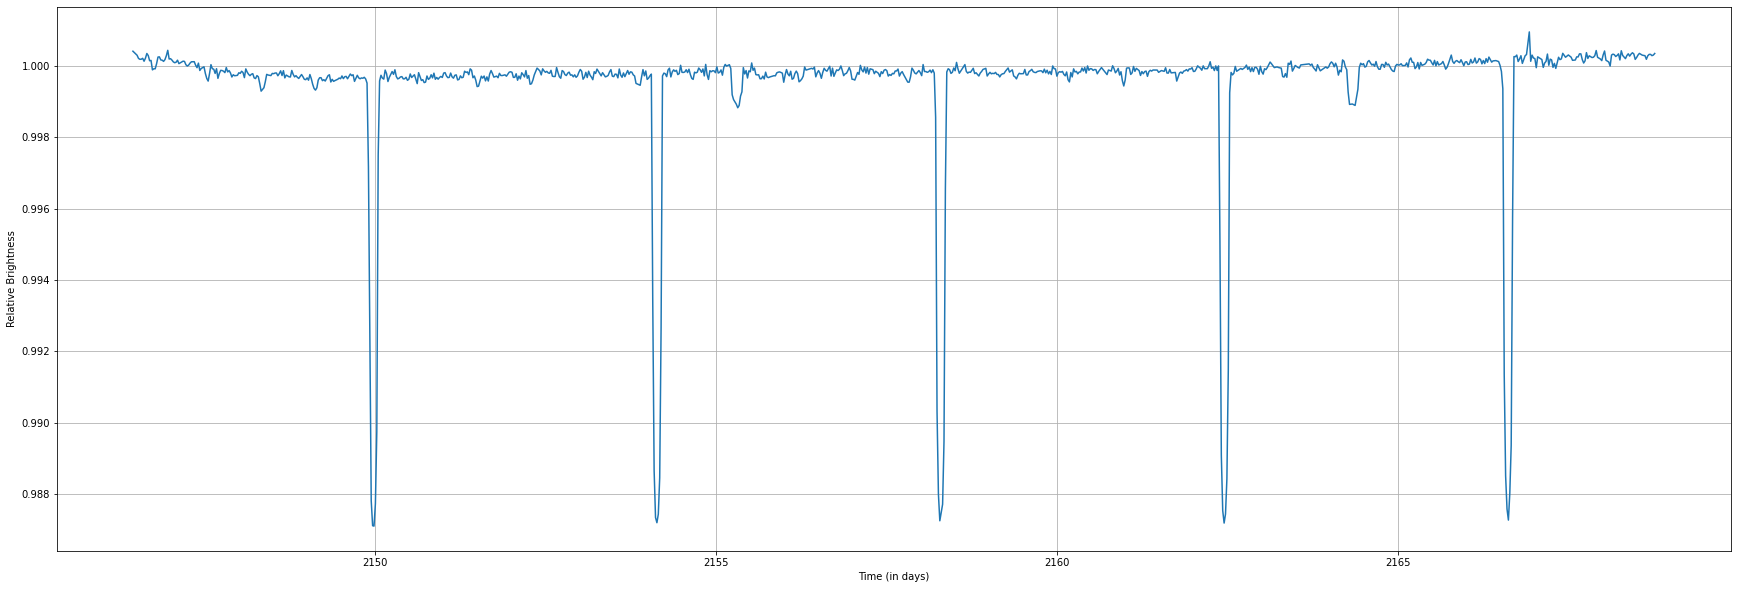

In [5]:
exoplanet = TransitingExoplanet(time, fraw, R)
exoplanet.plot_raw_data()

### Plotting the corrected data

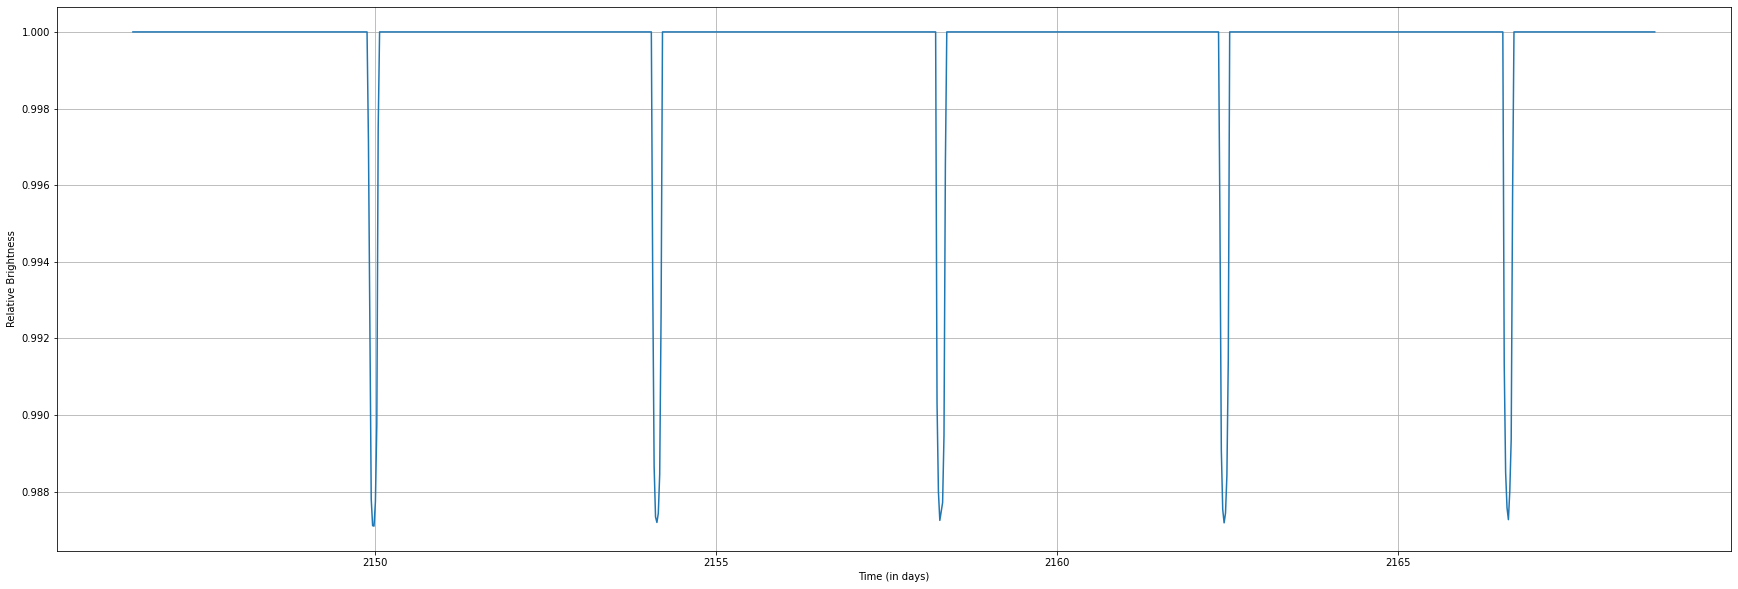

In [6]:
exoplanet.correct_data(threshold=0.998)
exoplanet.plot_corrected_data()

### Radius of the exoplanet

In [7]:
print("Radius of the planet is {} km".format(int(exoplanet.radius / 1000)))

Radius of the planet is 79189 km


### Orbital period of the exoplanet

In [8]:
print("The planet orbits around it's host star every {} Earth days".format(round(exoplanet.orbital_period, 2)))

The planet orbits around it's host star every 4.16 Earth days


### Transit duration of the exoplanet

In [9]:
print("The transit duration of the exoplanet is {} hours".format(round(exoplanet.transit_duration, 2)))

The transit duration of the exoplanet is 4.02 hours


### Data Collection
The data for the exoplanet `EPIC 206103150` was collected via the <a href="https://www.cfa.harvard.edu/~avanderb/k2.html" target="_blank">K2 Photometry Portal</a>